In [4]:
import nltk
import gensim
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [5]:
testsplit = []

with open ('TestSentences.txt') as x:
    sentences = sent_tokenize(x.read())

dictsent = [[y.lower() for y in word_tokenize(x)] for x in sentences]
model = Word2Vec(dictsent, min_count=1)
print(model)
words = list(model.wv.vocab)
print(words)
print(model.wv['doing'])
model.save('model.bin')
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=22, size=100, alpha=0.025)
['hey', 'how', 'are', 'you', 'doing', '.', 'is', 'it', 'going', 'today', 'i', 'am', 'very', 'well', 'not', 'that', 'was', 'alright', 'compared', 'to', 'other', 'days']
[ 5.4478977e-04 -1.2532399e-03 -7.8870769e-04 -3.4975386e-03
 -1.2117517e-03  4.8397379e-03 -1.7483638e-03  1.9752439e-03
 -2.5745158e-04 -1.2395022e-03 -9.8169316e-04  1.8478017e-03
  2.5424550e-03  4.7448603e-03 -2.9549759e-03  3.0027232e-03
 -6.5748597e-04 -2.0769257e-03 -3.1848683e-03 -2.2018212e-03
  2.8143506e-04  1.8847303e-03 -3.5503989e-03  5.2638614e-04
  1.4006849e-03  4.4067749e-03  3.8622501e-03  2.8899449e-03
 -1.8506040e-03 -1.4525102e-03  4.8321448e-03  1.2712576e-04
 -3.0567513e-03 -4.5539960e-03  3.4541094e-03  2.7959752e-03
 -4.4070990e-03 -2.9337108e-03 -2.9234253e-03 -2.7892055e-04
 -1.3728123e-03  2.3370702e-03  1.1495767e-03  4.2211544e-05
 -3.1551505e-03  6.5507821e-04  4.7806590e-03 -1.4276822e-03
  4.5571425e-03 -1.2100900e-05 -2.2685961e-03 -2.8124440e-

C:\Users\rayri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


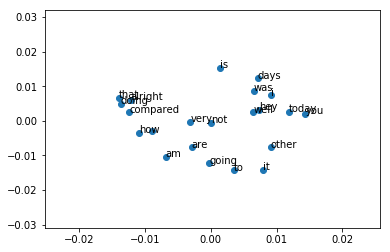

In [6]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()